# Project: Investigate a Dataset - No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> Sometimes, some people do make doctor appointment and refuse to show up even after receiving necessary instructions. Who do we blame for this attitude? The No-show appointments dataset contains 110527 obsrvations and 14 features about each patient.
The features are
1. PatientId: provides identification of a patient.
2. AppointmentID: gives the identification of each patient' appointment.
3. Gender: a categorical variable that provides the sex of each patient (Male or Female).
4. ScheduledDay  : provides the actual appointment date.
5. AppointmentDay: provides the date an appointment was made.
6. Age: provides the age of each patient.
7. Neighbourhood: gives info on the appointment location.
8. Scholarship: provides True of False info on whether a patient receives financial aid(social welfare) from the government or not
9. Hipertension: returns True or False on whether the patient has hypertension or not
10. Diabetes: returns True or False on whether the patient has Diabetes or not
11. Alcoholism: Provides information on if a patient takes alcohol or not (True or False)
12. Handcap: returns True or False on whether a patient is handicapped or not
13. SMS_received: provides one or more messages sent to the patient.
14. No-show: Gives information on if a patient shows up for the appointment or not. ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

### Question(s) for Analysis
> 1. What is the correlation or relationship between the numerical variables?
> 2. Does gender affect if a patient will show up or not?
> 3. Question 3: Does Age determine if a patient will show up for the appointment?
> 4. Does the difference between scheduled_day and appointment_day affect no_show feature?
> 5. Does scholarship affect no_show feature?
> 6. Which nighbourhood has the highest show and no show count?

In [123]:
# import all required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
%matplotlib inline

In [124]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 2.0MB/s eta 0:00:01  9% |███                             | 1.0MB 23.6MB/s eta 0:00:01    20% |██████▍                         | 2.1MB 25.0MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 1.7MB/s eta 0:00:01   38% |████████████▏                   | 5.1MB 24.3MB/s eta 0:00:01    46% |███████████████                 | 6.3MB 23.7MB/s eta 0:00:01    71% |███████████████████████         | 9.6MB 20.9MB/s eta 0:00:01    80% |█████████████████████████▋      | 10.7MB 22.3MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninstalled pandas-0.23.3


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [125]:
# Loading the dataset 
no_show_df = pd.read_csv('Database_No_show_appointments/noshowappointments.csv')

#print out the five lines
no_show_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Observation
> The Hypertension and Handicap column name are not correctly spelt and the No-show naming format does'nt look good

In [126]:
#Check for the number of observations(rows) and features(columns) in the dataframe.
no_show_df.shape

(110527, 14)

### Observation
> The dataframe has 110527 rows and 14 columns

In [127]:
#Provide summary information on each column
no_show_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [128]:
#Data type of each variable
no_show_df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

### Observation
> Some of the features such as the ScheduledDay and AppointmentDay do not have the correct datatype.

In [129]:
#Check for the presence of missing values in the dataframe
no_show_df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

### Observation
> The dataframe does not have any missing values

In [130]:
#Compute summary statistics on the numerical variable
no_show_df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

### Observation
> The Age column seems to have some ouliers, as it isnt possible for Age to be negative(min = -1)

In [131]:
#Check for duplicates
no_show_df.duplicated().sum()

0

### Observation
> The dataframe contains no duplicate rows


### Data Cleaning

#### Rename the appointment_id, scheduled_day, appointment_day and Hypertension , Handicap and No-show column

In [132]:
#Renaming the above stated columns
no_show_df.columns.values[np.r_[:, 1, 3:5, 8, 11, 13]] = ['Appointment_id', 'Scheduled_day', 'Appointment_day', 'Hypertension', 'Handicap', 'No_show']

In [133]:
#Converting the columns to lowercase for easy handling
no_show_df= no_show_df.rename(columns=str.lower)

In [134]:
for column in ['scheduled_day', 'appointment_day']:
    no_show_df[column]= no_show_df[column].apply(lambda x:x.split('T')[0])

In [135]:
no_show_df.head()

,patientid,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Change the ScheduledDay and AppointmentDay datatype to datetime and the appointment id to string

In [136]:
#Changing data types
no_show_df.scheduled_day = pd.to_datetime(no_show_df['scheduled_day'])
no_show_df.appointment_day = pd.to_datetime(no_show_df['appointment_day'])
no_show_df.appointment_id = no_show_df.appointment_id.astype(str)              
no_show_df.dtypes

patientid                 float64
appointment_id             object
gender                     object
scheduled_day      datetime64[ns]
appointment_day    datetime64[ns]
age                         int64
neighbourhood              object
scholarship                 int64
hypertension                int64
diabetes                    int64
alcoholism                  int64
handicap                    int64
sms_received                int64
no_show                    object
dtype: object

In [137]:
no_show_df.age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1629
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1545
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 44     1487
 18     1487
 58     1469
 46     1460
 45     1453
        ... 
 74      602
 76      571
 75      544
 78      541
 77      527
 80      511
 81      434
 82      392
 79      390
 84      311
 83      280
 85      275
 86      260
 87      184
 89      173
 88      126
 90      109
 92       86
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       5
 100       4
 102       2
 99        1
-1         1
Name: age, Length: 104, dtype: int64

### Observation
> The age column seems to contain an outlier

Text(0,0.5,'Frequency')

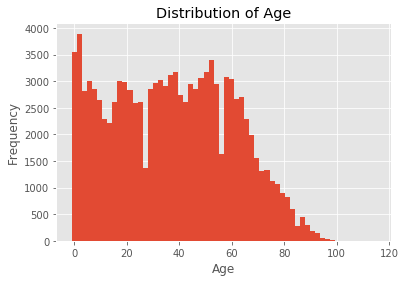

In [138]:
#Preview the distribution of age column to detect potential outliers
plt.hist(no_show_df.age, bins = 60);
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

#### Observation
The Outlier is -1. It is not possible for an age to be less than -1, therefore, the -1 age with index 99832 will be dropped.

In [139]:
#Drop any age that is less than 0
age_1 = no_show_df.query('age < 0')
age_1

,patientid,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
99832,4.659432e+14,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [140]:
no_show_df.drop(99832, axis=0, inplace=True)

In [141]:
#Check to see if the row has been dropped
no_show_df.shape

(110526, 14)

#### Drop irrelevant features(Columns) 
> Irrelevant columns such as such as Patientid will be dropped because it is not useful for my analysis.

In [142]:
#Dropping the patientid column
no_show_df.drop('patientid', axis=1, inplace=True)

In [143]:
#Check if the column has been dropped
no_show_df.head(1)

,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

### Which features affect the chance of a patient showing up?
### Question 1: What is the correlation or relationship between the numerical variables?

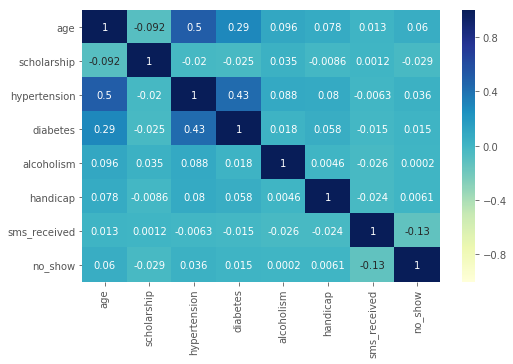

In [144]:
#encode the no_show column for easy visualization of the correlation between our main feature(no_show) and other variable
enc = no_show_df.copy()
enc['no_show'] = enc['no_show'].map({'Yes':0, 'No':1})
#Plot the correlation matrix(heatmap)
plt.figure(figsize=(8, 5))
cor = enc.corr();
sns.heatmap(cor, vmin=-1, vmax=1, cmap="YlGnBu", annot=True);

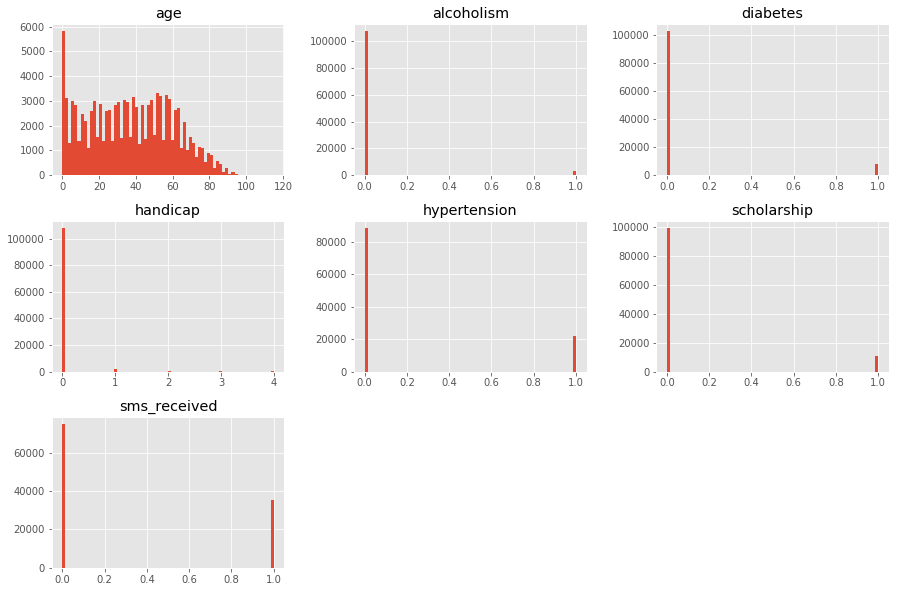

In [145]:
no_show_df.hist(figsize=(15,10), bins = 70);

#### Observation: 
> There are negative correlation between the no_show variable and sms_received and scholarship features. <br/>
> Although, unrelated to my feature of interest, there seems to be a quite good positive correlation (0.5) between age and hypertension, and (0.43) between diabetes and hyperstension. <br/>
> All other features do not have strong correlation with my feature of interest, therefore, inferences cannot be made with this heatmap.

### Question 2: Does gender affect if a patient will show up or not?
> Lets explore the gender feature. 


In [146]:
#Distribution of patient gender 
total_gender = no_show_df.groupby('gender').count()['appointment_id']
total_gender

gender
F    71839
M    38687
Name: appointment_id, dtype: int64

In [147]:
#Filter gender by no_show to determine which gender do show up and those that does not
gender_count = no_show_df.groupby(['gender', 'no_show']).count()['appointment_id']
gender_count

gender  no_show
F       No         57245
        Yes        14594
M       No         30962
        Yes         7725
Name: appointment_id, dtype: int64

In [148]:
#Get proportion of Females that did not show up
female_count = (gender_count['F']) / (total_gender['F'])*100
female_count

no_show
No     79.685129
Yes    20.314871
Name: appointment_id, dtype: float64

In [149]:
male_count =  (gender_count['M']/total_gender['M'])*100
male_count

no_show
No     80.032052
Yes    19.967948
Name: appointment_id, dtype: float64

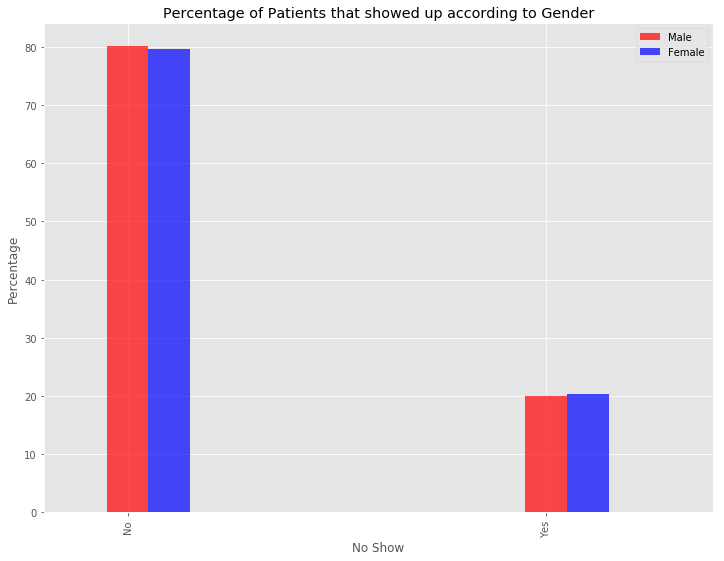

In [150]:
plt.style.use('ggplot');
fig, ax = plt.subplots(figsize =(12, 9));
male_count.plot.bar(stacked=True, width=0.1, position=0.5, color="Red", ax=ax, alpha=0.7);
female_count.plot.bar(stacked=True, width=0.1, position=-0.5, color="Blue", ax=ax, alpha=0.7);
plt.legend(['Male', 'Female']);
plt.title('Percentage of Patients that showed up according to Gender');
plt.xlabel('No Show');
plt.ylabel('Percentage');

#### Observation:
> From the proportion above, it can be deduced that the percentage of male that shows up for appointment (80.03%) is slightly higher than the percentage of females(79.69) that shows up for the appointment. Likewise, the percentage of females that did not show up is more than that of males(19.97%) 

### Question 3: Does Age determine if a patient will show up for the appointment?
> To determine this, I will divide the age into 4 range i.e (Children[0-12], Teenagers[13-19], Adult[20-59], '[60-115])

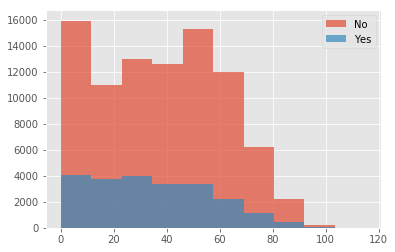

In [151]:
no_show_df.query('no_show == "No"')['age'].hist(alpha=0.7)
no_show_df.query('no_show == "Yes"')['age'].hist(alpha=0.7)
plt.legend(["No", "Yes"]);

In [152]:
no_show_df['age'].max()

115

In [153]:
#Create bin edges
bin_edges = [0, 12, 19, 59, 115]
bin_names=['Children', 'Teenagers', 'Adult', 'Aged']
no_show_df['age_range']= pd.cut(no_show_df['age'], bin_edges, labels=bin_names)

In [154]:
total_age = no_show_df.groupby('age_range').count()['appointment_id']
age_count = no_show_df.groupby(['age_range', 'no_show']).count()['appointment_id']

In [155]:
age_percentage = (age_count/total_age)*100
age_percentage

age_range  no_show
Children   No         79.036406
           Yes        20.963594
Teenagers  No         74.037333
           Yes        25.962667
Adult      No         79.070951
           Yes        20.929049
Aged       No         84.688046
           Yes        15.311954
Name: appointment_id, dtype: float64

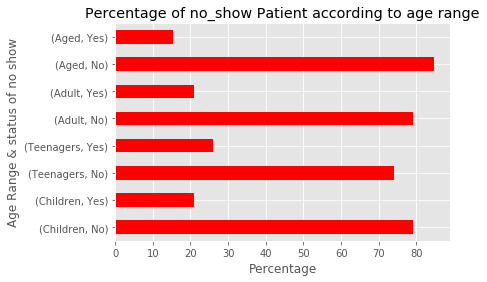

In [156]:
age_percentage.plot(kind='barh', color = 'red');
plt.title('Percentage of no_show Patient according to age range');
plt.xlabel('Percentage');
plt.ylabel('Age Range & status of no show');

#### Observation
> From the plot above, it can be deduced that the percentage of of teenagers that did not show up for appointment is higher than every other age range. This is followed by Children(20.96) and Adult(20.93). The aged seems to show up a lot after booking appointment as they have a very high percentage (84.7%) of showing up.

### Question 4: Does the difference between scheduled_day	and appointment_day	affect no_show feature?

In [157]:
#Subtract scheduled day from appointment date to get the date difference
no_show_df['days_diff'] = (no_show_df['appointment_day'] - no_show_df['scheduled_day']).dt.days

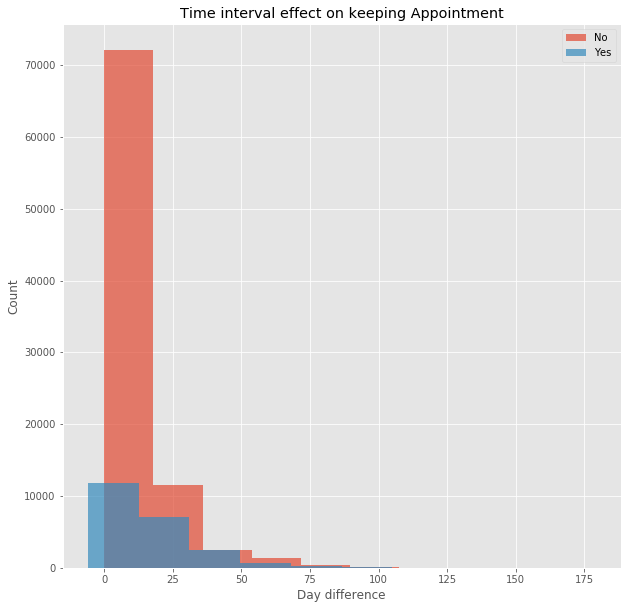

In [158]:
plt.figure(figsize=(10,10))
no_show_df.query('no_show == "No"')['days_diff'].hist(alpha=0.7);
no_show_df.query('no_show == "Yes"')['days_diff'].hist(alpha=0.7);
plt.legend(["No", "Yes"]);
plt.title('Time interval effect on keeping Appointment')
plt.xlabel('Day difference')
plt.ylabel('Count');

#### Observation: 
> It can be deduced from the plot above that those with time interval between 0 days and 25 days tend to show up for appointment than those whose appointment date is later.
> 

### Question 5: Does scholarship affect no_show feature?

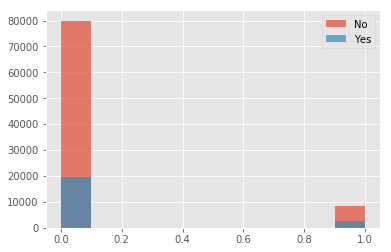

In [159]:
no_show_df.query('no_show == "No"')['scholarship'].hist(alpha=0.7)
no_show_df.query('no_show == "Yes"')['scholarship'].hist(alpha=0.7)
plt.legend(["No", "Yes"]);

#### Observation
From the above chart, it can be deduced that the ratio of those that show up for appointment is higher than those that do not on the scholarship axis(1.0=Yes)

### Question 6: Which nighbourhood has the highest show and no show count

In [160]:
no_show_df.groupby('no_show')['neighbourhood'].value_counts()

no_show  neighbourhood              
No       JARDIM CAMBURI                 6252
         MARIA ORTIZ                    4586
         RESISTÊNCIA                    3525
         JARDIM DA PENHA                3246
         SANTA MARTHA                   2635
         CENTRO                         2631
         ITARARÉ                        2591
         TABUAZEIRO                     2559
         SANTO ANTÔNIO                  2262
         BONFIM                         2223
         JESUS DE NAZARETH              2157
         SANTO ANDRÉ                    2063
         JABOUR                         2058
         CARATOÍRA                      1974
         SÃO PEDRO                      1933
         NOVA PALESTINA                 1862
         DA PENHA                       1788
         ANDORINHAS                     1741
         ROMÃO                          1740
         ILHA DO PRÍNCIPE               1734
         GURIGICA                       1562
         SÃO JOSÉ 

#### Observation: 
> It can be deduced from the value count above that people from JARDIM CAMBURI tend to show up more for appoinment while does from SANTA CECÍLIA have a low show up count.

<a id='conclusions'></a>

## Conclusions
> To answer the first question, there are relationships mostly negative between my feature of interest(no_show) and other features. There are some positive relationship, but I can't make much deduction from the heatmap. The reason for this is because the correlation heatmap cannot do justice to visualizing the relationship between each features of the variables. This is probably because most of the features are categorical.

> From question 2 'Does gender affect if a patient will show up or not?'. From the bar plot, it is obvious that the difference between the percentage of females to males that did not show up is very small. Therefore, it cannot be declared that gender affect chance of showing up.

> For question 3, Age did determine if a patient will show up for the appointment. From the plots, it is obvious that age does affect the if a patient will keep appointment or not.

> Time difference affect the chance of keeping up with appointment. Those with appointment time frame within the day the schedule was made tend to show up that those whose appointment date is far from the day they made the appointment. It may be that they have forgotten that they have an appointment due to the long time lapse.

> Scholarship does not really affect no ahow rate, althoug, a greater percentage of those with scholarship tend to show up for their appointment

> People in certain neighbourhood tend to show up for appointment than others. This may be due to the proximity of their neigbourhood to the hospital.

> Most of the deductions from this analysis are based on assumptions, a machine learning model can help to provide more accurate deductions and insight.


## Limitation

> The Date column(appointment_day and scheduled_day) were in UTC format. My plan was to get the time interval and not days interval, but somehow I could'nt do that as I was getting negative time interval and had to opt for days interval.

## References

> https://stackoverflow.com/ <br/>
> https://medium.com/ <br/>
> https://www.geeksforgeeks.org/ <br/>
> https://practicaldatascience.co.uk/ <br/>
> https://www.codegrepper.com/ <br/>
> https://towardsdatascience.com/ 

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0